# Corporación Favorita Grocery Sales Forecasting
This notebook uses a dataset from [Kaggle's Corporación Favorita Grocery Sales Forecasting](https://www.kaggle.com/c/favorita-grocery-sales-forecasting) competition:
> In this competition, Corporación Favorita has challenged the Kaggle community to build a model that more accurately forecasts product sales. They currently rely on subjective forecasting methods with very little data to back them up and very little automation to execute plans. They’re excited to see how machine learning could better ensure they please customers by having just enough of the right products at the right time.

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Train set

In [157]:
df_train_dates = pd.read_csv('train.csv', usecols=['date'], parse_dates=['date'])

In [158]:
print('Timedelta: {} days from {} to {}'.format(
    pd.Timedelta(df_train_dates.date.max() - df_train_dates.date.min()).days,
    df_train_dates.date.min().date(),
    df_train_dates.date.max().date()))

Timedelta: 1687 days from 2013-01-01 to 2017-08-15


In [234]:
(df_train_dates.date == '2017-08-02').argmax()

124035459

In [150]:
df_train = pd.read_csv('train.csv', 
                       converters={'unit_sales': lambda x: float(x) if float(x) > 0 else 0}, 
                       skiprows=range(1, 124035460), 
                       parse_dates=['date'])

print('Size of training set: {} rows and {} columns'.format(*df_train.shape))
df_train.head()

Size of training set: 1461581 rows and 6 columns


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,124035459,2017-08-02,1,96995,1.0,False
1,124035460,2017-08-02,1,103520,1.0,False
2,124035461,2017-08-02,1,103665,2.0,False
3,124035462,2017-08-02,1,105574,8.0,False
4,124035463,2017-08-02,1,105575,8.0,False


In [151]:
print('Timedelta: {} days from {} to {}'.format(
    pd.Timedelta(df_train.date.max() - df_train.date.min()).days,
    df_train.date.min().date(),
    df_train.date.max().date()))

Timedelta: 13 days from 2017-08-02 to 2017-08-15


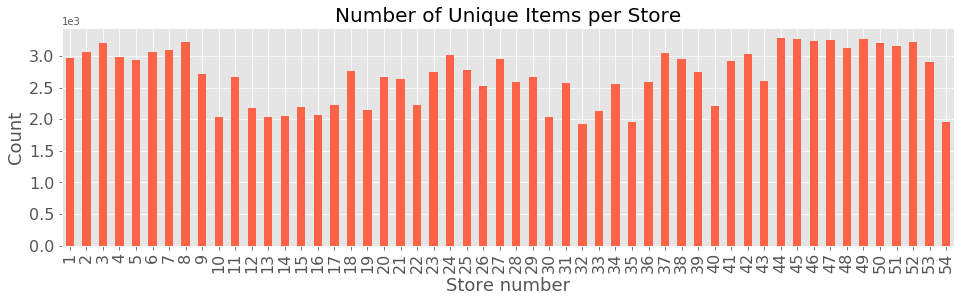

In [152]:
df_train.groupby('store_nbr').agg({'item_nbr': lambda x: x.nunique()}).plot(
    kind='bar',
    figsize=(16,4), 
    legend=False,
    fontsize=16,
    color='tomato')

plt.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
plt.xlabel('Store number', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Number of Unique Items per Store', fontsize=20)
plt.show()

In [153]:
df_train.unit_sales.describe()

count    1.461581e+06
mean     7.830799e+00
std      2.160031e+01
min      0.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      8.000000e+00
max      4.908000e+03
Name: unit_sales, dtype: float64

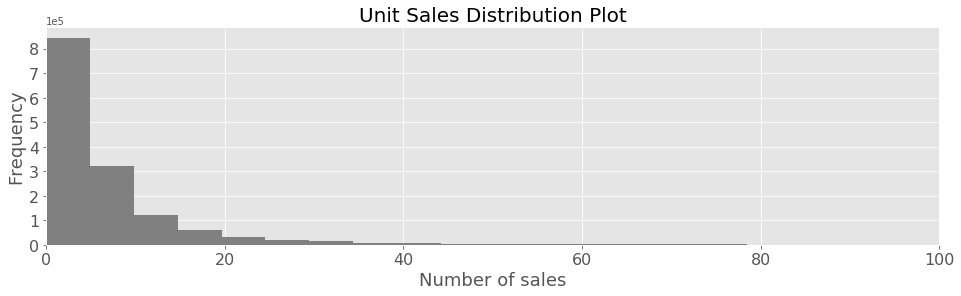

In [5]:
df_train.unit_sales.plot(
    kind='hist',
    bins=1000,
    figsize=(16,4), 
    fontsize=16,
    xlim=[0, 100],
    color='grey')

plt.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
plt.xlabel('Number of sales', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Unit Sales Distribution Plot', fontsize=20)
plt.show()

In [6]:
df_train['unit_sales'] = df_train['unit_sales'].apply(np.log1p)

## Test set

In [145]:
df_test = pd.read_csv('test.csv', parse_dates=['date'])

print('Size of test set: {} rows and {} columns'.format(*df_test.shape))
df_test.head()

Size of test set: 3370464 rows and 5 columns


,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


In [148]:
print('Timedelta: {} days from {} to {}'.format(
    pd.Timedelta(df_test.date.max() - df_test.date.min()).days,
    df_test.date.min().date(),
    df_test.date.max().date()))

Timedelta: 15 days from 2017-08-16 to 2017-08-31


## Stores

In [9]:
df_stores = pd.read_csv('stores.csv')

print('Size of test set: {} rows and {} columns'.format(*df_stores.shape))
df_stores.head()

Size of test set: 54 rows and 5 columns


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [10]:
df_stores.city.value_counts().head()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Machala           2
Name: city, dtype: int64

In [57]:
df_stores[df_stores.cluster == 10]

,store_nbr,city,state,type,cluster
25,26,Guayaquil,Guayas,D,10
27,28,Guayaquil,Guayas,E,10
28,29,Guayaquil,Guayas,E,10
30,31,Babahoyo,Los Rios,B,10
35,36,Libertad,Guayas,E,10
42,43,Esmeraldas,Esmeraldas,E,10


In [55]:
df_stores.groupby(['cluster', 'type']).size().to_frame()

,,0
cluster,type,
1,D,3
2,D,2
3,C,7
4,D,3
5,A,1
6,B,6
7,C,2
8,D,3
9,D,2


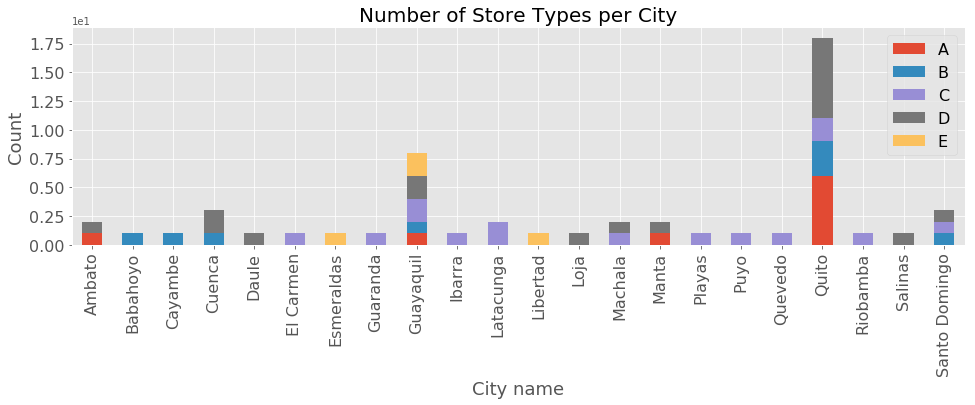

In [85]:
pd.crosstab(df_stores.city, df_stores.type).plot(
    kind='bar',
    stacked=True,
    figsize=(16,4), 
    fontsize=16)

plt.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
plt.xlabel('City name', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Number of Store Types per City', fontsize=20)
plt.legend(fontsize=16)
plt.show()

## Items

In [13]:
df_items = pd.read_csv('items.csv')

print('Size of test set: {} rows and {} columns'.format(*df_items.shape))
df_items.head()

Size of test set: 4100 rows and 4 columns


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


## Transactions

In [14]:
df_trans = pd.read_csv('transactions.csv')

print('Size of test set: {} rows and {} columns'.format(*df_trans.shape))
df_trans.head()

Size of test set: 83488 rows and 3 columns


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


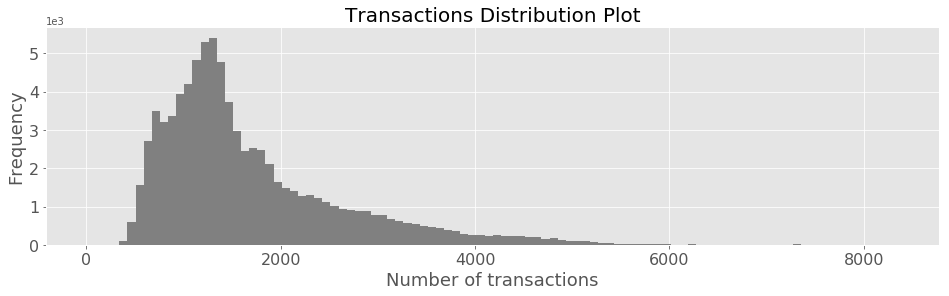

In [15]:
df_trans.transactions.plot(
    kind='hist',
    bins=100,
    figsize=(16,4), 
    fontsize=16,
    color='grey')

plt.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
plt.xlabel('Number of transactions', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.title('Transactions Distribution Plot', fontsize=20)
plt.show()

## Oil

In [58]:
df_oil = pd.read_csv('oil.csv', parse_dates=['date'])

print('Size of test set: {} rows and {} columns'.format(*df_oil.shape))
df_oil.head()

Size of test set: 1218 rows and 2 columns


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


Timedelta: 1703 days


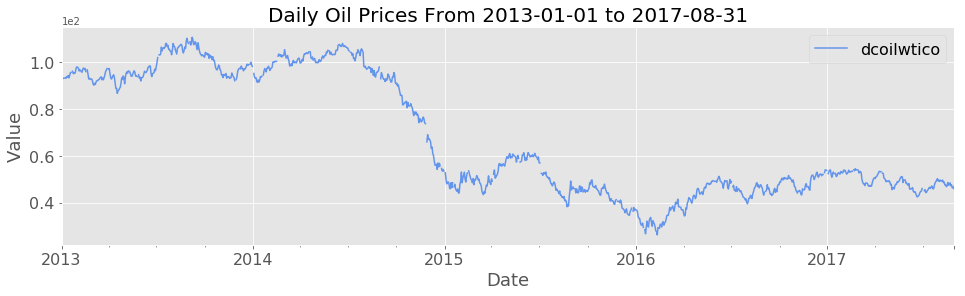

In [143]:
print('Timedelta: {} days'.format(pd.Timedelta(df_oil.date.max() - df_oil.date.min()).days))

df_oil.plot(
    x='date',
    y='dcoilwtico',
    figsize=(16,4),
    fontsize=16,
    color='cornflowerblue')

plt.ticklabel_format(style='sci', scilimits=(0,0), axis='y')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Value', fontsize=18)
plt.title('Daily Oil Prices From {} to {}'.format(
    df_oil.date.min().date(), df_oil.date.max().date()), fontsize=20)
plt.legend(fontsize=16)
plt.show()

## Holidays

In [38]:
df_holiday = pd.read_csv('holidays_events.csv', parse_dates=['date'])

print('Size of test set: {} rows and {} columns'.format(*df_holiday.shape))
df_holiday.head()

Size of test set: 350 rows and 6 columns


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [154]:
print('Timedelta: {} days from {} to {}'.format(
    pd.Timedelta(df_holiday.date.max() - df_holiday.date.min()).days,
    df_holiday.date.min().date(),
    df_holiday.date.max().date()))

Timedelta: 2125 days from 2012-03-02 to 2017-12-26


In [26]:
df_holiday.type.unique()

array(['Holiday', 'Transfer', 'Additional', 'Bridge', 'Work Day', 'Event'], dtype=object)